Lab 1 - Data Analytics

Dawid Bogon

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sb
import math
np.random.seed(0)

1. Create a ```jupyter``` notebook.
2. Using ```numpy.random``` generate arrays of:
   - 1000 samples of uniform distribution on interval $[0,1]$
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=1$.
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=10$.
   - 1000 samples of beta distribution for the following pairs of parameters $(\alpha,\beta)\in\{(1,1), (2,2),(3,9)\}$
   - 10000 samples of two-dimensional normal distributions each with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrices

$$\Sigma_1 = \begin{bmatrix} 1 & 0 \\ 0 & 1  \end{bmatrix}$$
$$\Sigma_2 = \begin{bmatrix} 2 & 1 \\ 1 & 2  \end{bmatrix}$$

In [95]:
uniform_0_1 = np.random.uniform(0.0,1.0,1000)
normal_mean_0_var_1 = np.random.normal(0.0, 1.0, 1000)
normal_mean_0_var_10 = np.random.normal(0.0, 10.0, 1000)
beta_1_1 = np.random.beta(1,1,1000)
beta_2_2 = np.random.beta(2,2,1000)
beta_3_9 = np.random.beta(3,9,1000)
mean = [0, 0]
sigma_1 = [[1, 0], [0, 1]]
sigma_2 = [[2, 1], [1, 2]]
norm_2d_1 = np.random.multivariate_normal(mean, sigma_1, (10000))
norm_2d_2 = np.random.multivariate_normal(mean, sigma_2, (10000))

3. For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).

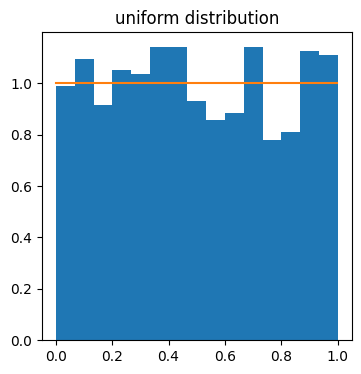

In [96]:
def plotter(hist_data,title, bin_num=15,xlim=(0,1), function=None, par_1=0, par_2=1):
    plt.figure(figsize=(4, 4))
    plt.subplot(111)
    plt.hist(hist_data,bins=bin_num,density=True)
    plt.title(title)
    if function is not None:
        a, b = xlim
        x_axis = np.arange(a, b, 0.001)
        plt.plot(x_axis, function(x_axis, par_1, par_2))
    plt.show()


plotter(uniform_0_1,'uniform distribution',15, function=stats.uniform.pdf, par_1=0, par_2=1)

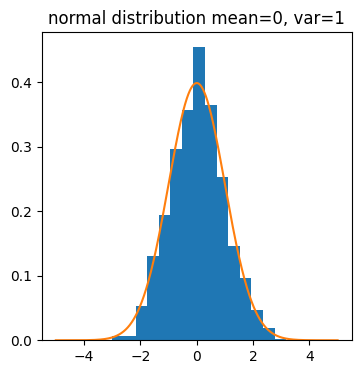

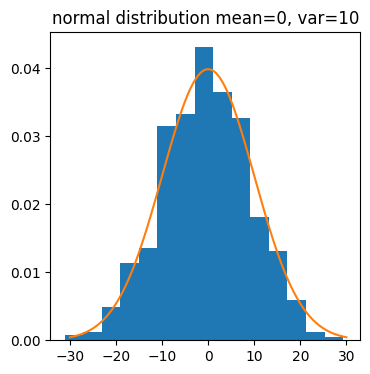

In [97]:
plotter(normal_mean_0_var_1,'normal distribution mean=0, var=1',15,xlim=(-5,5), function=stats.norm.pdf, par_1=0, par_2=1)
plotter(normal_mean_0_var_10,'normal distribution mean=0, var=10',15,xlim=(-30,30), function=stats.norm.pdf, par_1=0, par_2=10)

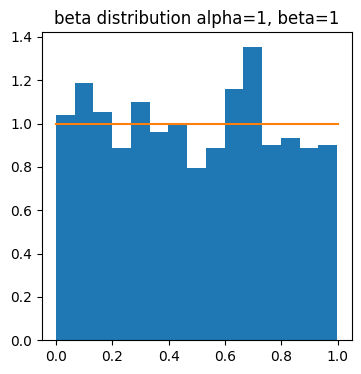

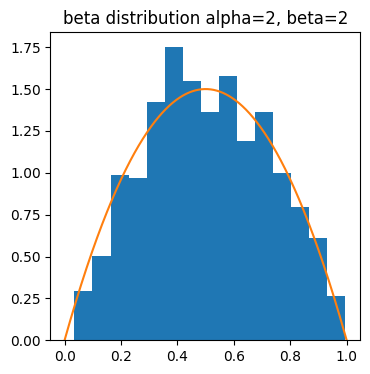

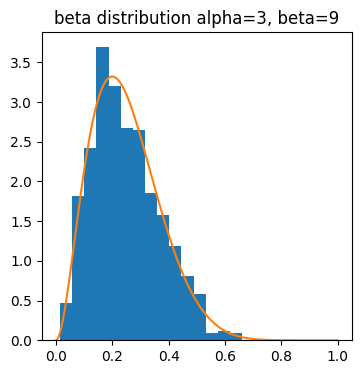

In [98]:
plotter(beta_1_1,'beta distribution alpha=1, beta=1',15,xlim=(0,1), function=stats.beta.pdf, par_1=1, par_2=1)
plotter(beta_2_2,'beta distribution alpha=2, beta=2',15,xlim=(0,1), function=stats.beta.pdf, par_1=2, par_2=2)
plotter(beta_3_9,'beta distribution alpha=3, beta=9',15,xlim=(0,1), function=stats.beta.pdf, par_1=3, par_2=9)

4. For two-dimensional distributions use ```hist2d``` method from ```pyplot```. Try to analyze influence of bins. Try different 2d histogram functions (ex. from ```seaborn```).


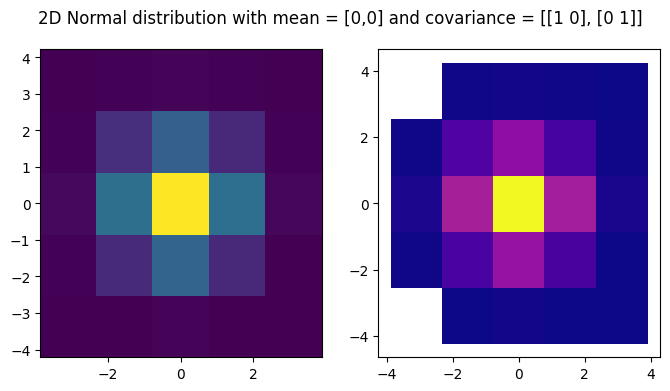

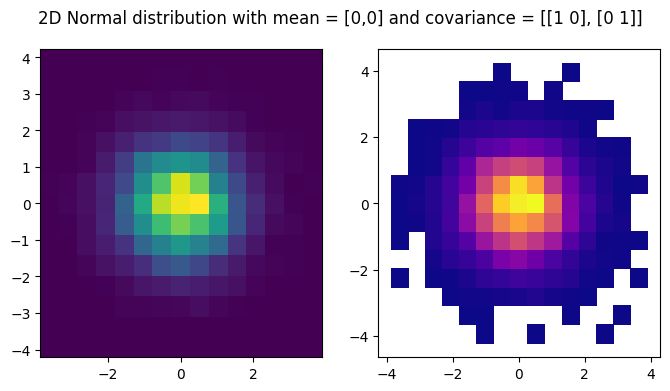

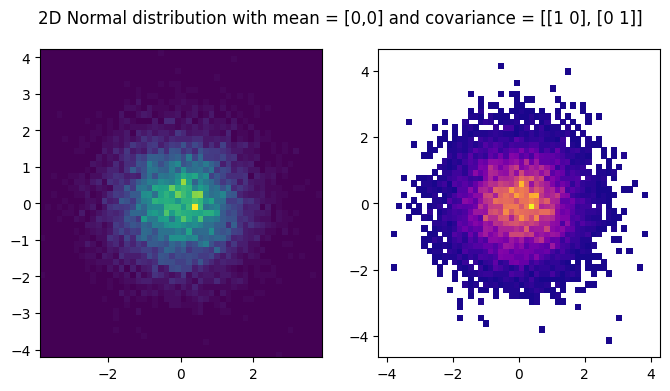

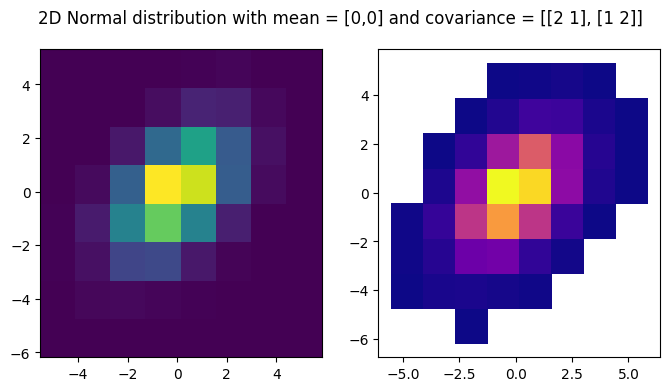

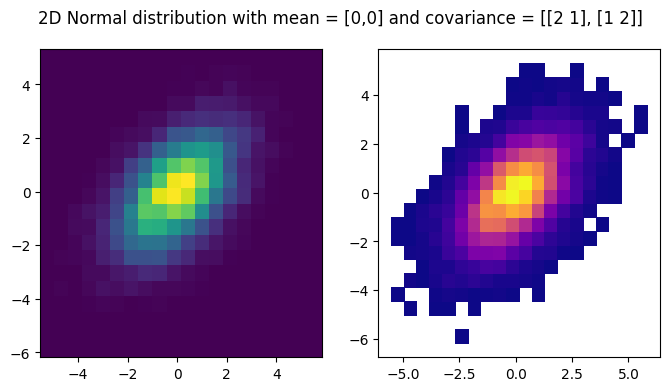

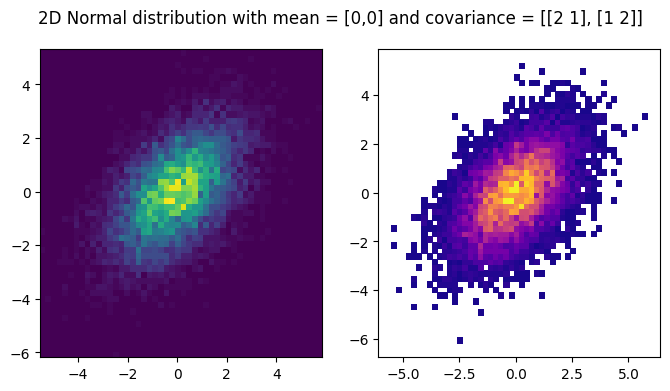

In [99]:
def plotter2d(hist_data,title, bin_num=50):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.hist2d(hist_data[:, 0], 
           hist_data[:, 1],bins = bin_num)
    plt.subplot(122)
    sb.histplot(data=hist_data, x=hist_data[:,0], y=hist_data[:,1],bins=bin_num,cmap='plasma')
    plt.suptitle(title)
    plt.show()

plotter2d(norm_2d_1,"2D Normal distribution with mean = [0,0] and covariance = [[1 0], [0 1]]",bin_num=5)
plotter2d(norm_2d_1,"2D Normal distribution with mean = [0,0] and covariance = [[1 0], [0 1]]",bin_num=15)
plotter2d(norm_2d_1,"2D Normal distribution with mean = [0,0] and covariance = [[1 0], [0 1]]",bin_num=50)
plotter2d(norm_2d_2,"2D Normal distribution with mean = [0,0] and covariance = [[2 1], [1 2]]",bin_num=8)
plotter2d(norm_2d_2,"2D Normal distribution with mean = [0,0] and covariance = [[2 1], [1 2]]",bin_num=20)
plotter2d(norm_2d_2,"2D Normal distribution with mean = [0,0] and covariance = [[2 1], [1 2]]",bin_num=50)

5. Generate 1000 $y$ points from the following model (
First sample $\alpha,\ \beta,\ x, \ \sigma$, then compute $\mu$ algebraically, then sample a value of $y$. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)
$$
    \begin{aligned}
    y\sim{}& \mathrm{Normal}(\mu, \sigma)\\
    \mu={}& \alpha + \beta x\\
    \alpha\sim{}&\mathrm{Normal}(2,0.1)\\
    \beta\sim{}&\mathrm{Normal}(0.2,0.2)\\
    x\sim{}&\mathrm{Normal}(0,3)\\
    \sigma\sim{}&\mathrm{HalfNormal}(0,1)
    \end{aligned} 
$$

In [100]:
alpha = np.random.normal(2.0, 0.1, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
x = np.random.normal(0.0, 3.0, 1000)
sigma = np.abs(np.random.normal(0.0, 1.0, 1000))

mi = alpha + beta*x
y = np.random.normal(mi, sigma, 1000)

6. Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair (on the same plot). 

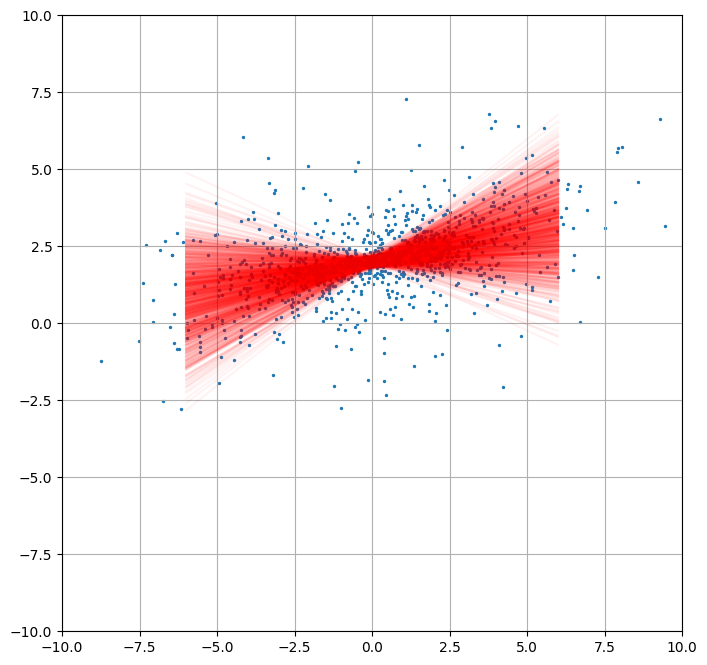

In [107]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y,s=2)
x_low = np.full((1000), -6)
x_high =  np.full((1000), 6)
plt.plot([x_low,x_high], [alpha + beta*x_low,alpha + beta*x_high], 'red', alpha=0.05)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.show()